In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import normalize

In [21]:
cat_results = np.load('catboost_results_cluster.npz')
cluster_lgb_results = np.load('cluster_lgb_results.npz')
lgb_results = np.load('lgb_latest_results.npz')
dt_results = np.load('dt_new_results.npz')
logistic_results = np.load('correct_logistic_results.npz')
xgb_results = np.load('correct_xgb_preds_results.npz', allow_pickle=True)
test_y = cat_results['test_target']

In [32]:
xgb_results['feature_importance']

array({'f12': 2.7501129976650267, 'f2': 3.0358835308286296, 'f13': 2.667208954959792, 'f9': 2.3292823313190953, 'f14': 2.89767045013674, 'f18': 3.3821877188852567, 'f11': 2.1769125589148706, 'f5': 3.2513307858107234, 'f10': 2.129928516301226, 'f16': 2.473939708634344, 'f1': 2.9345095514259456, 'f3': 1.9774804346659063, 'f0': 1.8659503157283346, 'f15': 2.639854424701746, 'f19': 3.0611041056162933, 'f8': 2.504385014308149, 'f4': 3.500599230711267, 'f7': 1.98073532886079, 'f17': 3.0097082614916078, 'f6': 8.732483022234511},
      dtype=object)

In [33]:
xgb_imp = [1.8659503157283346, 2.9345095514259456, 3.0358835308286296, 1.9774804346659063, 3.500599230711267, 3.2513307858107234,
          8.732483022234511, 1.98073532886079, 2.504385014308149, 2.3292823313190953, 2.129928516301226, 2.1769125589148706, 
           2.7501129976650267, 2.667208954959792, 2.89767045013674, 2.639854424701746, 2.473939708634344, 3.0097082614916078,
          3.3821877188852567, 3.0611041056162933]
xgb_imp = np.array(xgb_imp)

In [3]:
train_X = pd.read_csv('~/CS229/new_data/new_train_X.csv')
val_X = pd.read_csv('~/CS229/new_data/new_valid_X.csv')
train_y = pd.read_csv('~/CS229/new_data/new_train_y.csv')
val_y = pd.read_csv('~/CS229/new_data/new_valid_y.csv')

test_X = pd.read_csv('~/CS229/new_data/new_test_X.csv')
test_y = pd.read_csv('~/CS229/new_data/new_test_y.csv')

In [12]:
print(classification_report(lgb_results['val_target'],logistic_results['val_preds']>0.5))
print(roc_auc_score(lgb_results['val_target'], logistic_results['val_preds']))

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69     45023
         1.0       0.70      0.70      0.70     46757

    accuracy                           0.70     91780
   macro avg       0.70      0.70      0.70     91780
weighted avg       0.70      0.70      0.70     91780

0.7630735829335613


In [9]:
print(classification_report(cat_results['val_target'],cat_results['val_preds']>0.5))
print(roc_auc_score(cat_results['val_target'], cat_results['val_preds']))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     45023
         1.0       0.79      0.77      0.78     46757

    accuracy                           0.78     91780
   macro avg       0.78      0.78      0.78     91780
weighted avg       0.78      0.78      0.78     91780

0.780160002590915


In [49]:
print(lgb_results['test_target'].shape)
print(lgb_results['test_preds'].shape)

(91780,)
(91780,)


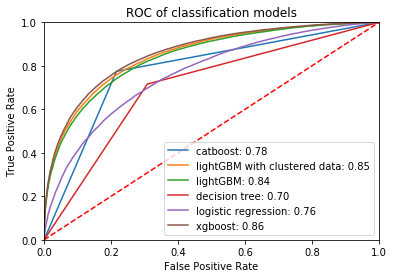

In [19]:
plt.title('ROC of classification models')
fpr, tpr, threshold = metrics.roc_curve(test_y, cat_results['test_preds'])
roc_auc1 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'catboost: %0.2f' % roc_auc1)

fpr, tpr, threshold = metrics.roc_curve(test_y, cluster_lgb_results['test_preds'])
roc_auc2 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'lightGBM with clustered data: %0.2f' % roc_auc2)

fpr, tpr, threshold = metrics.roc_curve(test_y, lgb_results['test_preds'])
roc_auc3 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'lightGBM: %0.2f' % roc_auc3)

fpr, tpr, threshold = metrics.roc_curve(test_y, dt_results['test_preds'])
roc_auc4 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'decision tree: %0.2f' % roc_auc4)

fpr, tpr, threshold = metrics.roc_curve(test_y, logistic_results['test_preds'])
roc_auc5 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'logistic regression: %0.2f' % roc_auc5)

fpr, tpr, threshold = metrics.roc_curve(test_y, xgb_results['test_preds'])
roc_auc6 = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label = 'xgboost: %0.2f' % roc_auc6)


plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('all_roc.png')
plt.show()

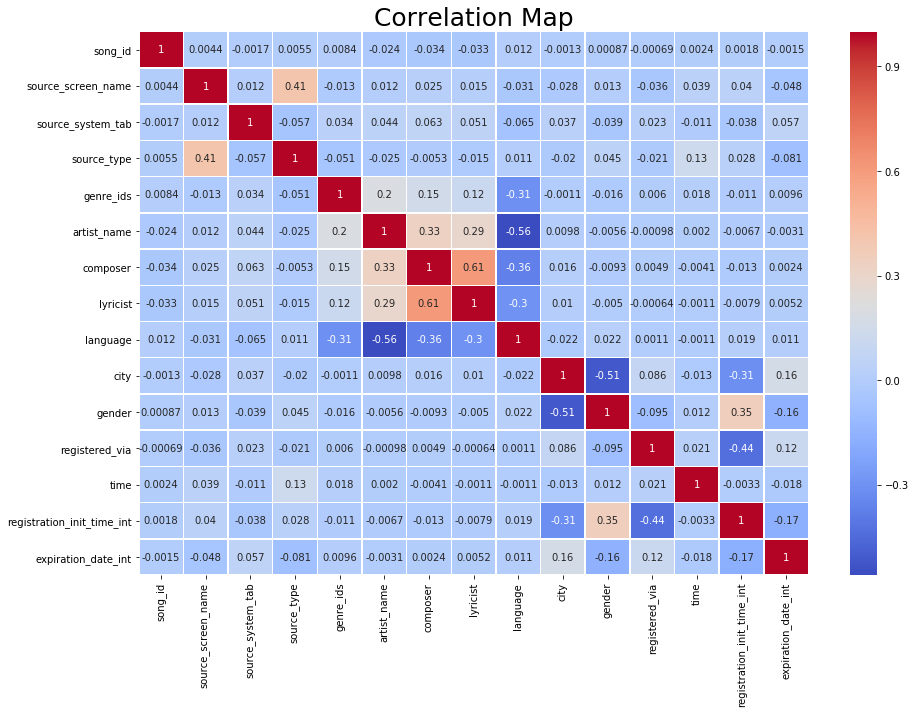

In [29]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_X.drop(['bd', 'song_length','Unnamed: 0','Unnamed: 0.1','msno'], axis=1, inplace=False).corr(),
            linewidths=0.5,
            cmap="coolwarm",
            annot=True)
plt.title('Correlation Map', fontsize = 25)
plt.savefig('Correlation.png')
plt.show()

In [15]:
cat_imp = pd.read_csv('catboost_imp.csv')
cat_imp

,Unnamed: 0,Unnamed: 1
0,Unnamed: 0,0.692493
1,Unnamed: 0.1,9.393626
2,msno,23.509588
3,song_id,9.458947
4,source_screen_name,7.803150
5,source_system_tab,3.865565
6,source_type,12.887592
7,song_length,1.218233
8,genre_ids,1.886397
9,artist_name,7.078522


In [57]:
features = pd.read_csv('catboost_imp.csv')['Unnamed: 0']
features_df = pd.DataFrame(features)
features_orig = ['Unnamed: 0', 'Unnamed: 0.1', 'msno', 'song_id', 'source_screen_name',
       'source_system_tab', 'source_type', 'song_length', 'genre_ids',
       'artist_name', 'composer', 'lyricist', 'language', 'city', 'bd',
       'gender', 'registered_via', 'time', 'registration_init_time_int',
       'expiration_date_int']
features_orig_df = pd.DataFrame(features_orig)
cat_imp = pd.read_csv('catboost_imp.csv')
cluster_lgb_imp = cluster_lgb_results['feature_importance']
lgb_imp = lgb_results['feature_importance']
dt_imp = dt_results['feature_importance']
# xgb_imp = xgb_results['feature_importance']

In [61]:
features_df.columns=['features']
features_orig_df.columns=['features']
features_df.head()


,features
0,Unnamed: 0
1,Unnamed: 0.1
2,msno
3,song_id
4,source_screen_name


In [39]:
print('cat:',cat_imp.shape)
print('cluster:',cluster_lgb_imp.shape)
print('lgb:',lgb_imp.shape)
print('dt:',dt_imp.shape)
print('xgb:',xgb_imp.shape)
print(features)
print(features_orig)

cat: (22, 2)
cluster: (22,)
lgb: (20,)
dt: (20,)
xgb: (20,)
0                     Unnamed: 0
1                   Unnamed: 0.1
2                           msno
3                        song_id
4             source_screen_name
5              source_system_tab
6                    source_type
7                    song_length
8                      genre_ids
9                    artist_name
10                      composer
11                      lyricist
12                      language
13                          city
14                            bd
15                        gender
16                registered_via
17                          time
18    registration_init_time_int
19           expiration_date_int
20                  song_cluster
21                    ui_cluster
Name: Unnamed: 0, dtype: object
['Unnamed: 0' 'Unnamed: 0.1' 'msno' 'song_id' 'source_screen_name'
 'source_system_tab' 'source_type' 'song_length' 'genre_ids' 'artist_name'
 'composer' 'lyricist' 'language' 'city'

In [52]:
cat_imp

,Unnamed: 0,Unnamed: 1
0,Unnamed: 0,0.692493
1,Unnamed: 0.1,9.393626
2,msno,23.509588
3,song_id,9.458947
4,source_screen_name,7.803150
5,source_system_tab,3.865565
6,source_type,12.887592
7,song_length,1.218233
8,genre_ids,1.886397
9,artist_name,7.078522


In [44]:
cluster_lgb_imp['features'] = features
lgb_imp['features'] = features_orig
dt_imp['features'] = features_orig
xgb_imp['features'] = features_orig

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
pd.concat(cluster_lgb_imp, features)

In [67]:
cluster_lgb_imp = pd.DataFrame(cluster_lgb_imp)
cluster_lgb_imp.columns = ['importance']
cluster = pd.concat([features_df, cluster_lgb_imp], axis = 1)
cluster.head()


,features,importance
0,Unnamed: 0,45222
1,Unnamed: 0.1,58327
2,msno,43298
3,song_id,38113
4,source_screen_name,9679


In [ ]:
lgb_imp = pd.DataFrame(lgb_imp)
lgb_imp.columns = ['importance']
lgb = pd.concat([features_orig_df, lgb_imp], axis = 1)
cluster.head()